In [0]:
import networkx as nx
import matplotlib
import numpy as np
from sklearn.metrics import mean_squared_error as mse,accuracy_score as ac

Load the data and visualize the graph with the nodes colored according to the ground truth labels, and
save it as “2.1.png”.

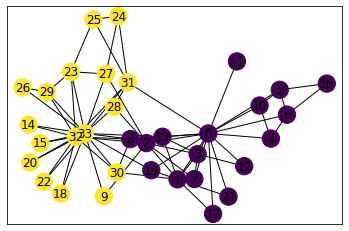

In [7]:
G = nx.karate_club_graph()
color=[]
for i in range(len(G.nodes)):
  if G.nodes[i]['club'] =='Mr. Hi':
    color.append(1)
  else:
    color.append(2)
nx.draw_networkx(G,node_color=color)

In [8]:
#adjacency matriix

adja=nx.to_numpy_matrix(G)
adja=np.array(adja)
adja



array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [9]:
degree_mat=np.zeros((len(G.nodes),len(G.nodes)))

for i in range (len(adja)):
  s=0
  for j in range (len(adja[0])):
      s+=adja[i][j]
  degree_mat[i][i]=s
degree_mat

array([[16.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  9.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 12.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 17.]])

0.058823529411764705
0.9411764705882353


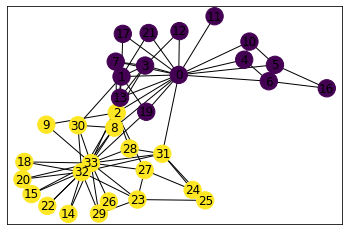

In [10]:
L=degree_mat-adja
from numpy.linalg import svd


u,d,v=svd(L)
# v[-1]
fd=np.array(v[-2])
# fd=fd[0]
fd
svd_color=[]
for i in range(len(fd)):
  if fd[i]<0:
      svd_color.append(1)
  else :
      svd_color.append(2)

nx.draw_networkx(G,node_color=svd_color)

print(mse(color,svd_color))
print(ac(color,svd_color))

just playing around with different libraries and proving that they do the same thing

0.058823529411764705
0.9411764705882353


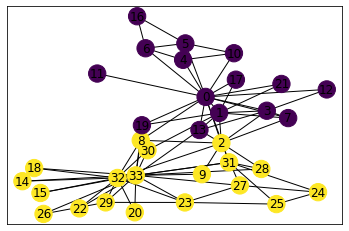

In [11]:
from scipy.sparse.csgraph import laplacian
from scipy.sparse import csr_matrix

lap=laplacian(nx.adjacency_matrix(G))
lap=csr_matrix.todense(lap)
lap

from numpy.linalg import svd


u,d,v=svd(lap)
fd=np.array(v[-2])
fd=fd[0]
fd
svd_color=[]
for i in range(len(fd)):
  if fd[i]<0:
      svd_color.append(1)
  else :
      svd_color.append(2)

nx.draw_networkx(G,node_color=svd_color)

print(mse(color,svd_color))
print(ac(color,svd_color))

0.058823529411764705
0.9411764705882353


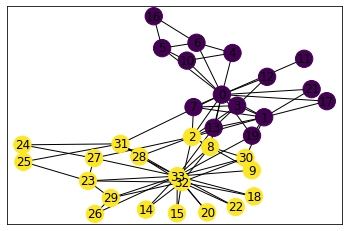

In [12]:

fd_spec=nx.fiedler_vector(G)
fd_color=[]
for i in range(len(fd_spec)):
  if fd_spec[i]<0:
      fd_color.append(1)
  else :
      fd_color.append(2)

nx.draw_networkx(G,node_color=fd_color)

print(mse(color,fd_color))
print(ac(color,fd_color))

the following uses normalised spectral clustering

0.9411764705882353


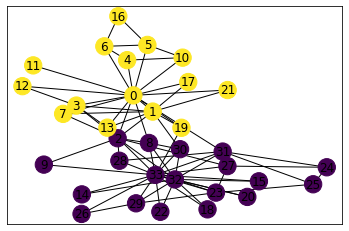

In [13]:
from sklearn.manifold import spectral_embedding as se


spec=se(nx.adjacency_matrix(G),n_components=1)
spec


spec_color=[]
for i in range(len(spec)):
  if spec[i]<0:
      spec_color.append(1)
  else :
      spec_color.append(2)
nx.draw_networkx(G,node_color=spec_color)
print(mse(color,spec_color))

0.058823529411764705


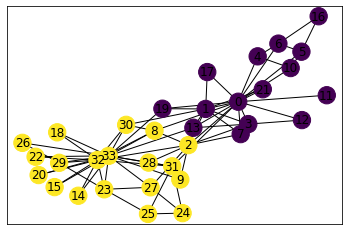

In [14]:
from scipy.sparse.csgraph import laplacian
from scipy.sparse import csr_matrix

lap=laplacian(nx.adjacency_matrix(G))
lap=csr_matrix.todense(lap)
lap

from numpy.linalg import svd


u,d,v=svd(lap)
fd=np.array(v[-2])
fd=fd[0]
fd
svd_color=[]
for i in range(len(fd)):
  if fd[i]<0:
      svd_color.append(1)
  else :
      svd_color.append(2)

nx.draw_networkx(G,node_color=svd_color)

print(mse(color,svd_color))

This library uses shi mallik's normalized spectral clustering

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


0.058823529411764705


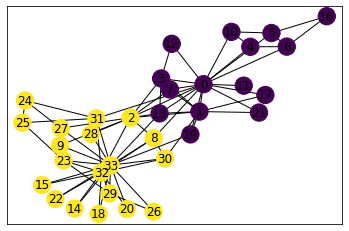

In [15]:
from sklearn.cluster import SpectralClustering as sc


sp=sc(n_clusters=2).fit(nx.adjacency_matrix(G))
spec=sp.labels_


spec_color=[]
for i in range(len(spec)):
  if fd_spec[i]<0:
      spec_color.append(1)
  else :
      spec_color.append(2)
nx.draw_networkx(G,node_color=spec_color)
print(mse(color,spec_color))